In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
covid = pd.read_csv("oct_16.csv")

In [3]:
covid.shape

(67568, 8)

In [4]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67568 entries, 0 to 67567
Data columns (total 8 columns):
Date_reported         67568 non-null object
 Country_code         67281 non-null object
 Country              67568 non-null object
 WHO_region           67568 non-null object
 New_cases            67568 non-null int64
 Cumulative_cases     67568 non-null int64
 New_deaths           67568 non-null int64
 Cumulative_deaths    67568 non-null int64
dtypes: int64(4), object(4)
memory usage: 4.1+ MB


In [5]:
covid.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [6]:
covid.rename(columns={"Date_reported":"date"}, inplace = True)

In [7]:
covid.head()

,date,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [8]:
covid['date'].nunique()

288

In [9]:
%matplotlib notebook
plt.style.use("ggplot")

In [10]:
covid.columns

Index(['date', ' Country_code', ' Country', ' WHO_region', ' New_cases',
       ' Cumulative_cases', ' New_deaths', ' Cumulative_deaths'],
      dtype='object')

In [11]:
tick_labels = ['Jan',"Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct"]

<IPython.core.display.Javascript object>


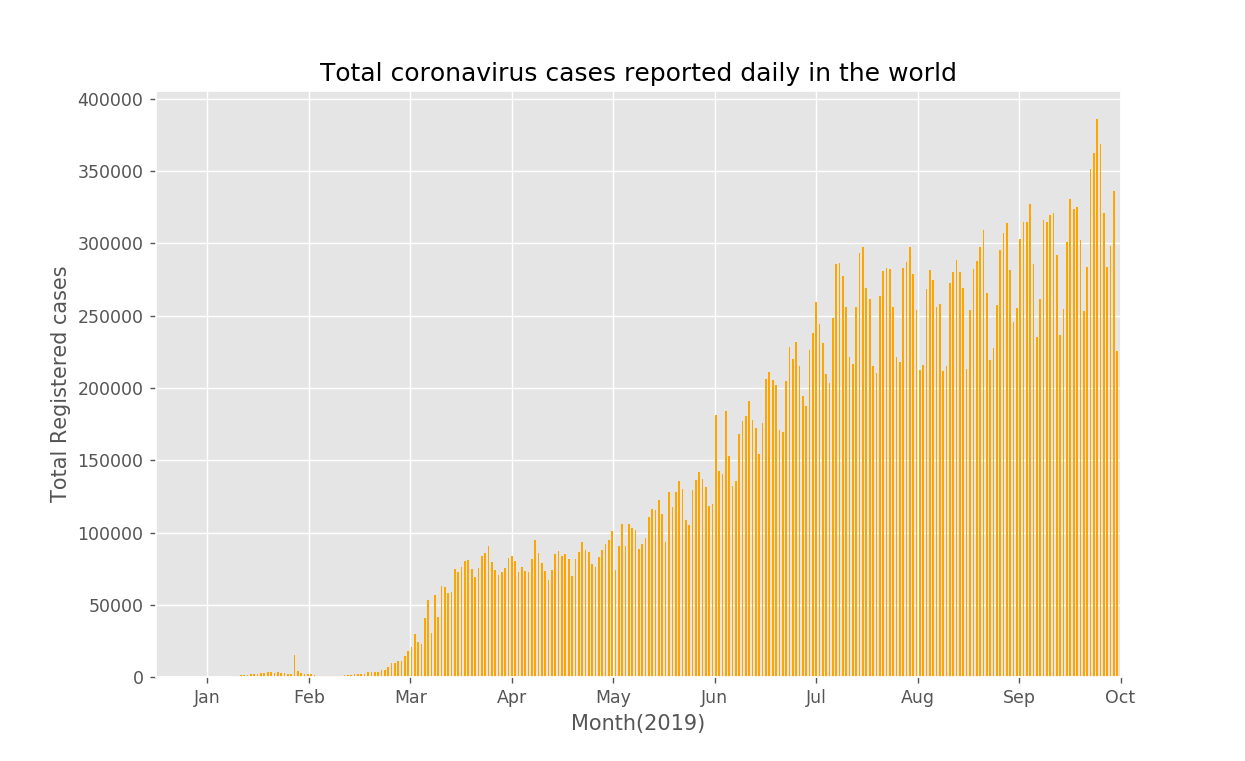

Text(0.5,1,'Total coronavirus cases reported daily in the world')

In [41]:
wh = covid.groupby("date").sum()[" New_cases"]
wh.plot(kind = "bar", color = "orange")
plt.xticks(np.linspace(15,wh.shape[0],len(tick_labels)),tick_labels, rotation = 0)
plt.xlabel("Month(2019)")
plt.ylabel("Total Registered cases")
plt.title("Total coronavirus cases reported daily in the world")

## After April coronavirus cases started rising rapidly once more from May which rose almost exponentially till beginning of August, and is still rising. An important thing to notice is that, at no point of time we have seen a clear downward slope in this graph. This denotes that, cases have constantly been rising over the days and there is still no sign of decrease in the number of daily reported cases. This also denotes that, the worldwide lockdown has done very little in stopping this pandemic.

In [12]:
covid.head()

,date,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [8]:
top = covid.drop_duplicates(subset =' Country',keep = 'last')[[' Country',' Cumulative_cases'," Cumulative_deaths"]]

<IPython.core.display.Javascript object>


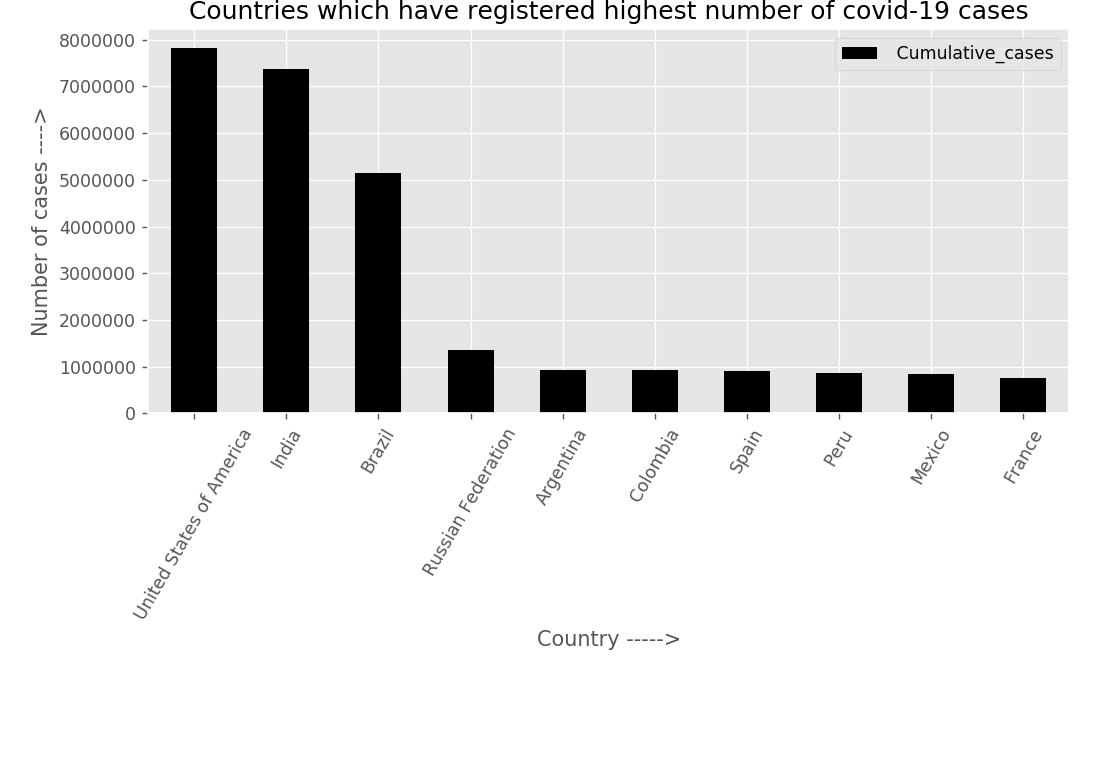

Text(0.5,1,'Countries which have registered highest number of covid-19 cases')

In [35]:
top.sort_values(' Cumulative_cases',ascending = False)[[" Country", " Cumulative_cases"]].head(10).set_index(' Country').plot(kind = 'bar', color = 'k',label = None )
plt.tight_layout()
plt.xticks(rotation = 60)
plt.xlabel("Country ----->")
plt.ylabel("Number of cases ---->")
plt.title("Countries which have registered highest number of covid-19 cases")

In [9]:
death = top.sort_values(' Cumulative_deaths',ascending = False)[[" Country", " Cumulative_deaths"]].head(10).set_index(' Country')
death.head()

,Cumulative_deaths
Country,
United States of America,215199
Brazil,151747
India,112161
Mexico,84898
The United Kingdom,43155


In [10]:
a = np.array(death[" Cumulative_deaths"].values)

<IPython.core.display.Javascript object>


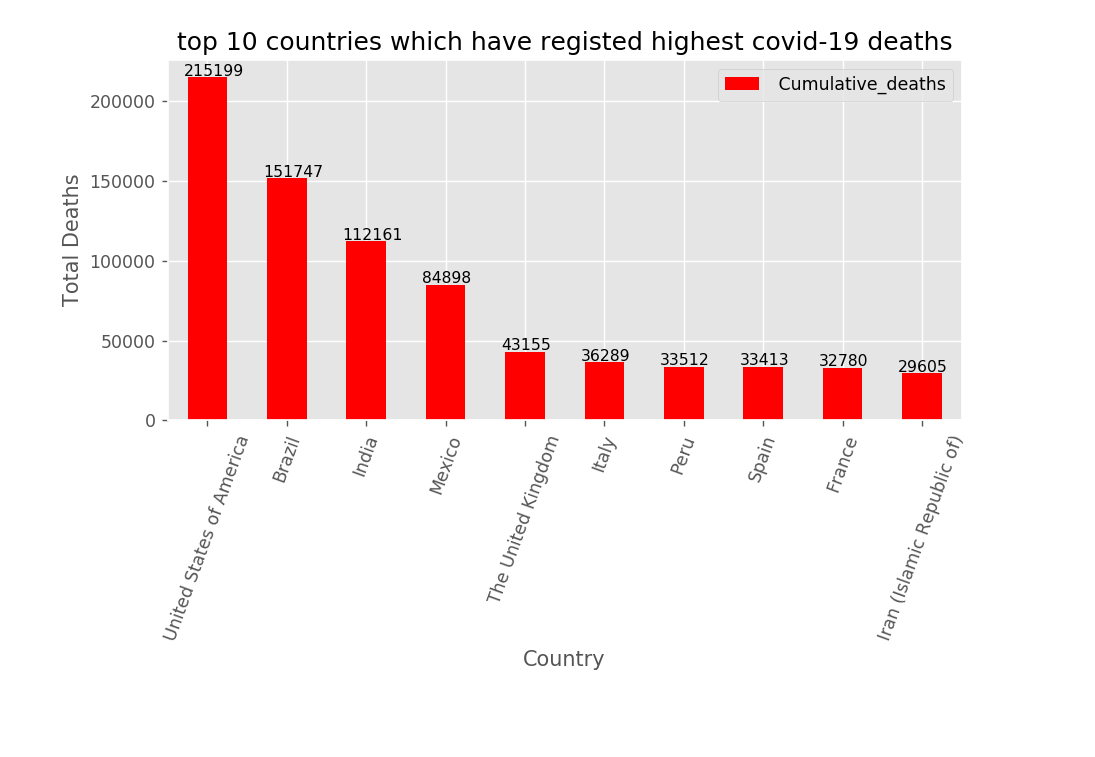

In [48]:
death.plot(kind = 'bar', color = 'red')
for i in range(10):
    plt.text(i-.3,a[i]+1000,a[i], fontsize = 9)
plt.xlabel("Country")
plt.ylabel('Total Deaths')
plt.title("top 10 countries which have registed highest covid-19 deaths")
plt.xticks(rotation = 70)
plt.tight_layout()
plt.show()

In [11]:
def get_month(a):
    return tick_labels[int(a[5:7]) - 1]

In [12]:
covid["month"] = covid["date"].apply(get_month)

In [58]:
covid.head()

,date,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,month
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0,Jan
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0,Jan
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0,Jan
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0,Jan
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0,Jan


In [60]:
countries = list(top.sort_values(' Cumulative_cases',ascending = False)[[" Country", " Cumulative_cases"]].head(10)[' Country'].values)

In [63]:
cadf = covid[covid[' Country'].isin(countries)]

In [17]:
import seaborn as sns

In [110]:
pivot = pd.pivot_table(cadf, values = " New_cases", index = ' Country', columns ="month", aggfunc = 'sum',)

In [111]:
pivot = pivot.reindex_axis(tick_labels, axis = 1)

C:\Users\Sritiman Adak\python\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  """Entry point for launching an IPython kernel.


In [114]:
pivot = pivot.drop(columns = 'Oct', axis = 1)

In [121]:
pivot = pivot.rename_axis({"Russian Federation": "Russia","United States of America": "USA"}, axis =0)

C:\Users\Sritiman Adak\python\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Using 'rename_axis' to alter labels is deprecated. Use '.rename' instead
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


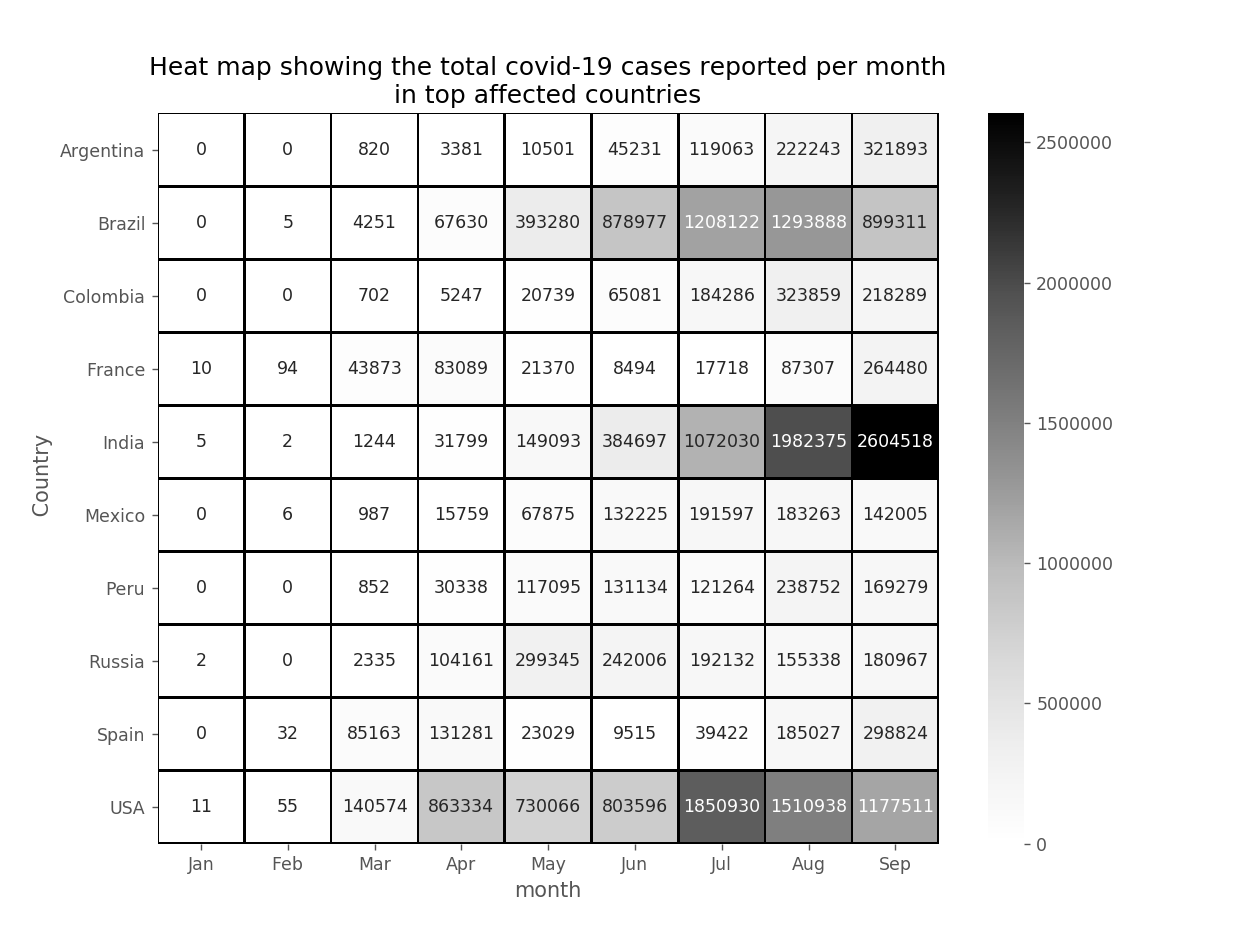

Text(0.5,1,'Heat map showing the total covid-19 cases reported per month\n in top affected countries ')

In [122]:
sns.heatmap(pivot, cmap = "Greys", linewidth = 1, linecolor = 'k', annot = True , fmt= '.7g')
plt.title("Heat map showing the total covid-19 cases reported per month\n in top affected countries ")


## Till September:
## -> USA reported highest number of cases in July which has gone down in the next 2 months
## -> India reported a record high of 2604518 cases in September, which is by far the highest cases reported in any month in the world.
## ->Similary brazil reported highest caes in August, theareafter declined.
## ->The second wave covid-19 in Spain and France came around September which made a record high cases reported in these countries (even higher than the previous outbreak).

In [14]:
countries = list(top.sort_values(' Cumulative_deaths',ascending = False)[[" Country", " Cumulative_deaths"]].head(10)[' Country'].values)

In [15]:
top.shape


(235, 3)

In [18]:
dadf = covid[covid[' Country'].isin(countries)]

In [20]:
pivot = pd.pivot_table(dadf, values = " New_deaths", index = ' Country', columns ="month", aggfunc = 'sum')

In [22]:
pivot = pivot.reindex_axis(tick_labels, axis = 1)

C:\Users\Sritiman Adak\python\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  """Entry point for launching an IPython kernel.


In [23]:
pivot = pivot.drop(columns = 'Oct', axis = 1)


In [28]:
pivot = pivot.rename_axis({'Iran (Islamic Republic of)':"Iran","United States of America": "USA",'The United Kingdom':"UK"}, axis =0)

C:\Users\Sritiman Adak\python\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Using 'rename_axis' to alter labels is deprecated. Use '.rename' instead
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


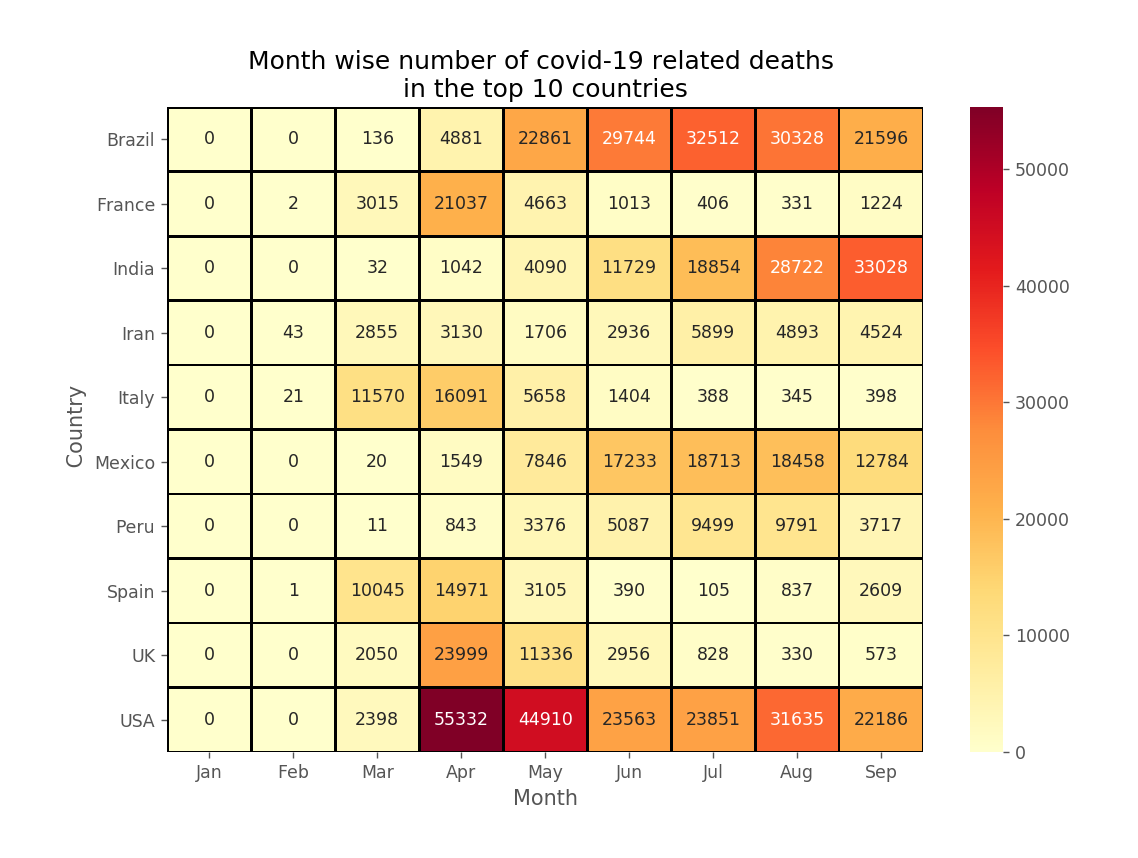

In [33]:
sns.heatmap(pivot, cmap = "YlOrRd", linewidth = 1, linecolor = 'k', annot = True , fmt= '.6g')
plt.title("Month wise number of covid-19 related deaths \nin the top 10 countries")
plt.xlabel("Month")
plt.tight_layout()

## Till September 2020:
## The USA has recorded the highest number of deaths reported in a single month which was in April 2020, and the number of deaths were 55,332. Deaths in USA came down in june and july but again went up in August.
## In India, the number of deaths have gradually increased over the months.
## In Brazil, highest number was reported in July
## France, Italy, Spain and UK recorded highest deaths in April, which was during the peak of the first wave of the coronavirus outbreak in these countries, but looking at the rising number of deaths in September, particularly in France, Spain and UK, it indicates that these countries are experiencing / going to experience a second wave of the Pandemic. 


In [43]:
covid[covid[" Country"]=="India"].shape

(288, 9)

<IPython.core.display.Javascript object>


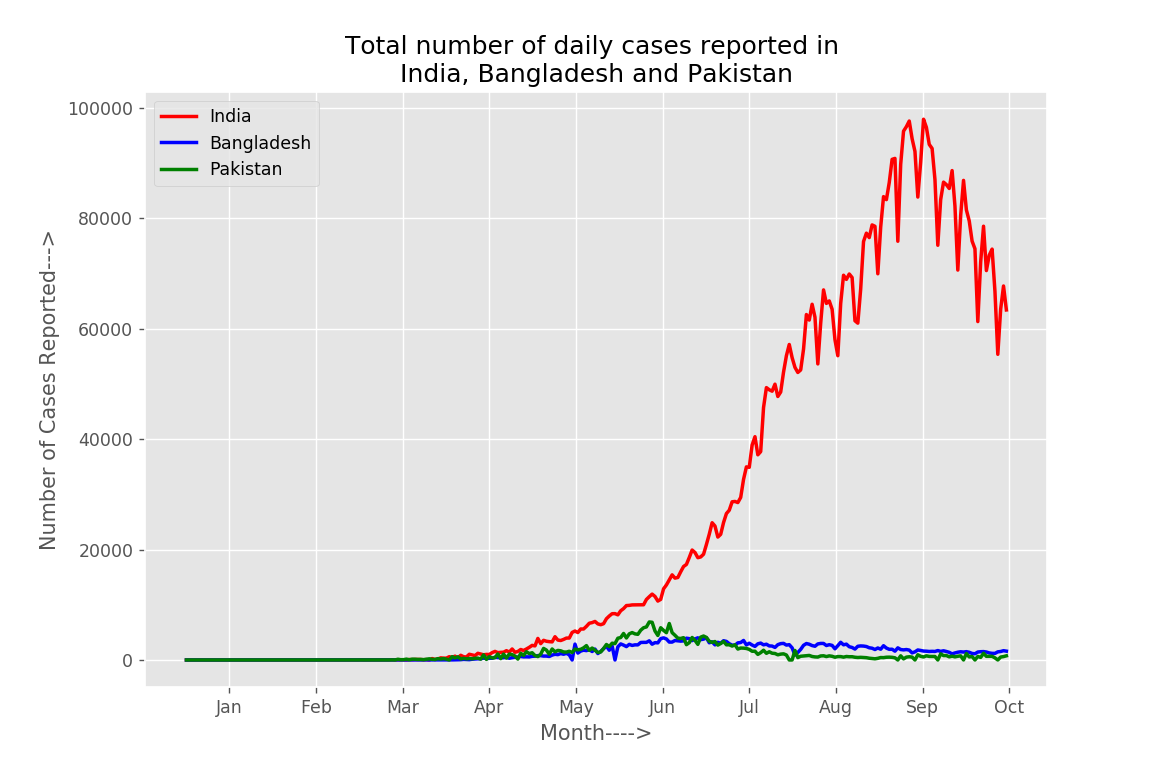

In [45]:
#india, pakistan, bangladesh
covid[covid[' Country']=="India"].set_index("date")[" New_cases"].plot(kind = "line", color = "red", linewidth = 2, label = "India")
covid[covid[' Country']=="Bangladesh"].set_index("date")[" New_cases"].plot(kind = "line", color = "blue", linewidth = 2, label = "Bangladesh")
covid[covid[' Country']=="Pakistan"].set_index("date")[" New_cases"].plot(kind = "line", color = "green", linewidth = 2, label = "Pakistan")
plt.xticks(np.linspace(15,288,len(tick_labels)),tick_labels, rotation = 0)
plt.xlabel("Month---->")
plt.ylabel("Number of Cases Reported--->")
plt.title("Total number of daily cases reported in \nIndia, Bangladesh and Pakistan")
plt.legend()
plt.show()

## This study shows that Pakistan and Bangladesh has been quite successful in containing the pandemic in their countries. India also seem to have been successfull in containing the pandemic because after mid September, cases started declining but still the extent of damage created due to the pandemic In India is far more than the other two countries. 

<IPython.core.display.Javascript object>


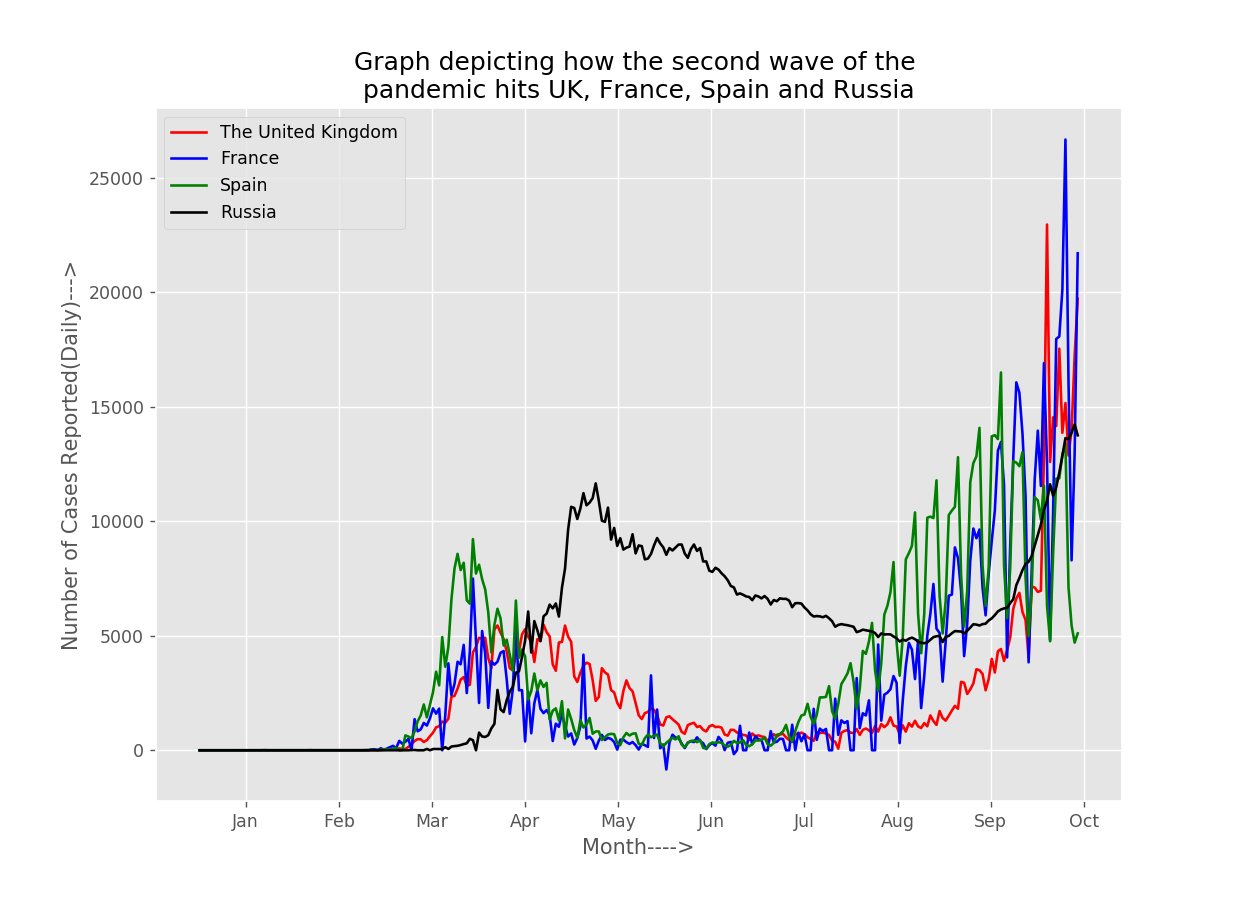

In [52]:
#UK, France, Spain, Russia
covid[covid[' Country']=='The United Kingdom'].set_index("date")[" New_cases"].plot(kind = "line", color = "red", linewidth = 1.5, label = 'The United Kingdom')
covid[covid[' Country']=='France'].set_index("date")[" New_cases"].plot(kind = "line", color = "blue", linewidth = 1.5, label = 'France')
covid[covid[' Country']=='Spain'].set_index("date")[" New_cases"].plot(kind = "line", color = "green", linewidth = 1.5, label = 'Spain')
covid[covid[' Country']=='Russian Federation'].set_index("date")[" New_cases"].plot(kind = "line", color = "black", linewidth = 1.5, label = "Russia")
plt.xticks(np.linspace(15,288,len(tick_labels)),tick_labels, rotation = 0)
plt.xlabel("Month---->")
plt.ylabel("Number of Cases Reported(Daily)--->")
plt.title("Graph depicting how the second wave of the \npandemic hits UK, France, Spain and Russia")
plt.legend()
plt.show()

## The Second wave of the pandenic hits UK, France, Spain and some other european countries around July, when lockdown was lifted and life was coming back to normal. In Russia cases were declining after May, but it started rising again around September almost exponentially.
## From the graph, it is also clear that the second wave of the outbreak has been even worse than the first wave. 

<IPython.core.display.Javascript object>


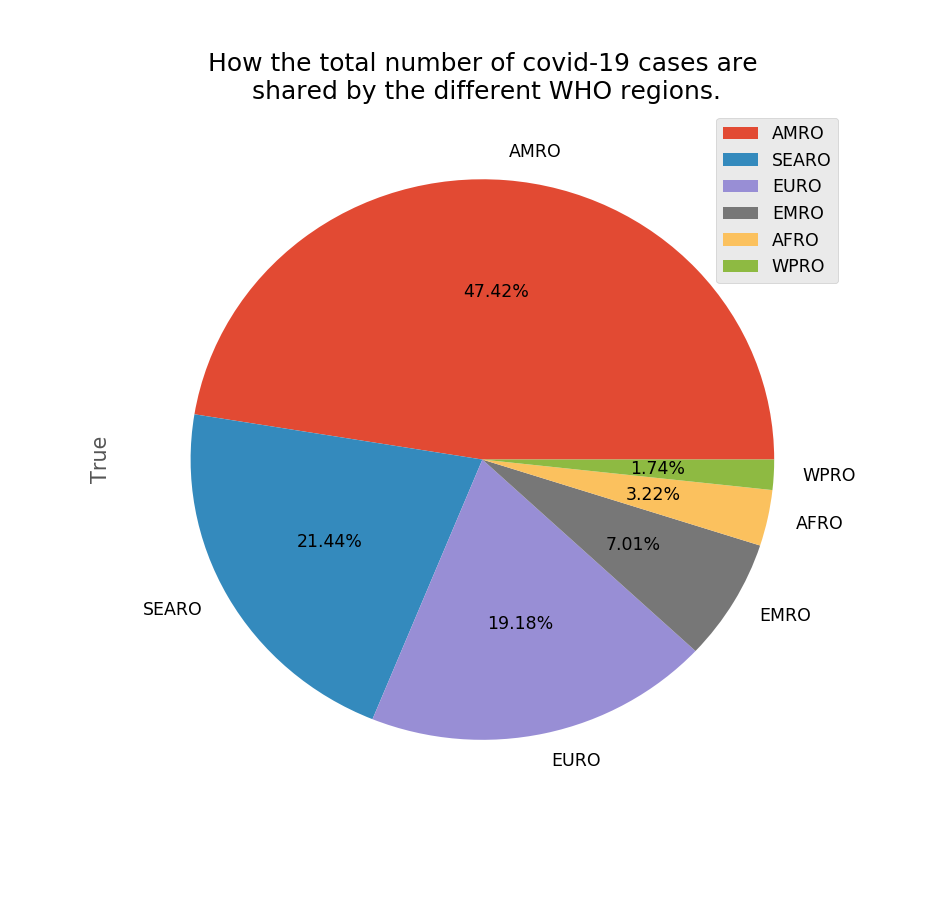

In [32]:
df =covid.groupby(" WHO_region").sum().sort_values(" New_cases", ascending =False).head(10)[' New_cases']
df= df[:-1]
df.plot(kind = "pie",autopct = "%.2f%%", label = True)
plt.legend()
plt.title("How the total number of covid-19 cases are\n shared by the different WHO regions.")
plt.show()

<IPython.core.display.Javascript object>


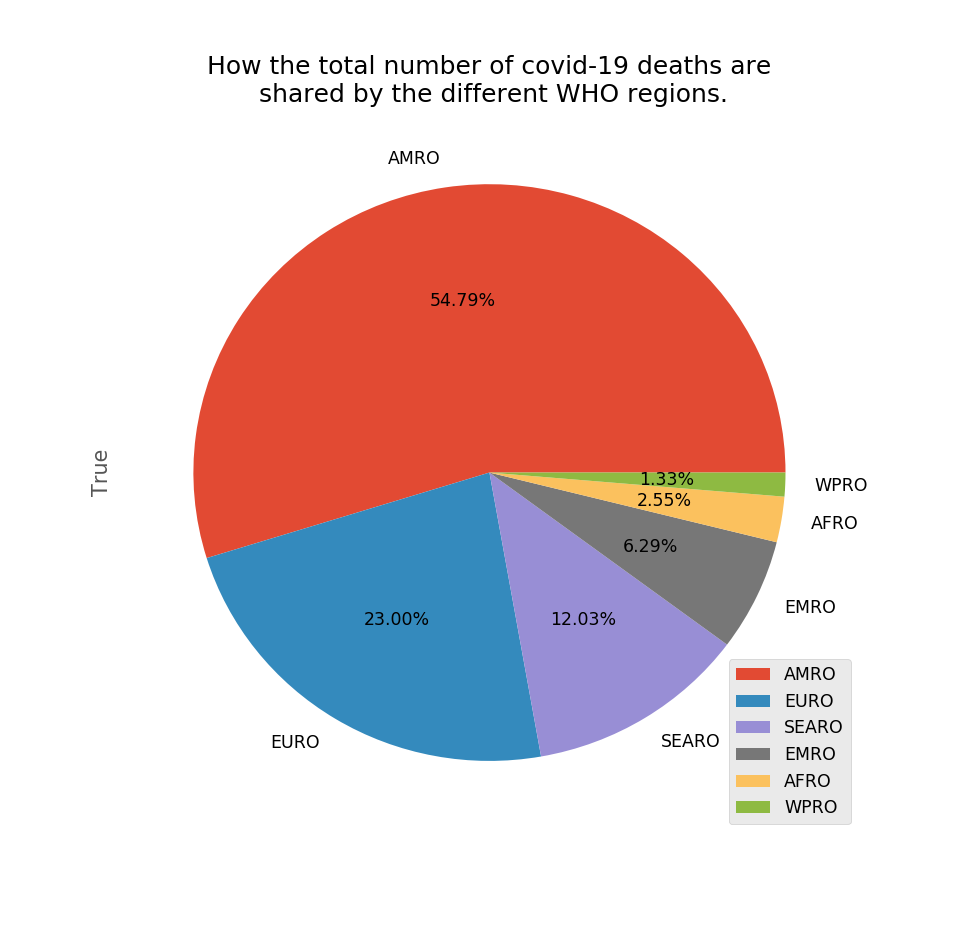

In [33]:
df =covid.groupby(" WHO_region").sum().sort_values(" New_deaths", ascending =False).head(10)[' New_deaths']
df= df[:-1]
df.plot(kind = "pie",autopct = "%.2f%%", label = True)
plt.legend()
plt.title("How the total number of covid-19 deaths are\n shared by the different WHO regions.")
plt.show()

## WHO Region Definitions:
## AFRO -> Africa, AMRO-> North, South America, SEARO-> South,East Asia, EMRO-> Eastern Mediterranian Region, WPRO-> Western Pacific Region, EURO-> European Region

## AMRO region has the highest number of cases which makes up 47% percent of the total Coronavirus cases in the world, followed by SEARO(21%) and EURO(19%). Number of deaths is also the highest in AMRO which is about 54.8% of the total deaths reported across the world, follow by EURO(23%) and SEARO(12 %).
## This pie chart also indicates that the mortality rate among the covid patients are more in AMRO and EURO region compared to SEARO and EMRO region.